<a id='top'></a>

<a href='#import'>Import &amp; Inspect</a> |
<a href='#fselect'>Problem Description</a> |
<a href='#compare'>Model Comparison &amp; Selection</a> |
<a href='#tuning'>Hyper Parameter Tuning</a> |
<a href='#bestmodel'>Evaluate the Best Model</a> | 
<a href='#interpretation'>Interpration of Results</a> |
<a href='#tuning'>Hyper Parameter Tuning</a> |
<a href='#conclusion'>Conlusion and Documentation</a> |
<a href='#discussion'>Discussion</a>
    
<br>

---

<a href='#top' id='import'>back to menu</a>

## Import and Load

In [1]:
# Pandas and numpy for data manipulation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
%matplotlib inline
plt.style.use('fivethirtyeight')

# Internal ipython tool for setting figure size

# Seaborn for visualization
#sns.set(font_scale = 2)

# Splitting data into training and testing

In [58]:
file = '/Users/macos/Google Drive/ResearchImac/SPRINGBOARD/DementiaPrediction/Data/oasis_longitudinal.csv'
long_df = pd.read_csv(file)

### The Data
> This dataset consists of a longitudinal collection of 150 subjects aged 60 to 96. We see data type of each feature along with non-null counts. In this longitudinal study each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

In [59]:
print('Number of Subjects: ',long_df['Subject ID'].nunique(),
      '\nNumber of Rows: ', long_df.shape[0])

Number of Subjects:  150 
Number of Rows:  373


<a href='#top' id='problem'>back to menu</a>

## Problem Description

In this project, we will work with the data collected from a longitudinal study on determining cognitive functionality performance of subject. **The objective is to build a model that can classify cognitve impairment(being demented) successfully and interpret the results to find factors which influence the score.**

The data includes the CDR score, which make this a supervised machine learning task. However, since the scores are to classify the stage of the dementia we will work on a supervised classification setting. In other words, our CDR score is a ordinal data so we treat this task as a classification problem to determine which class a subject falls into.

While there is currently no cure for AD, early, accurate and effective detection of AD is beneficial
for the management of the disease. Structural magnetic resonance imaging (sMRI) plays an important role in distinguishing AD subjects from normal controls (NC), and to distinguish mild cognitive impairment (MCI) subjects who
later convert to AD from those who do not.

<a href='#top' id='aging'>back to menu</a>

## Healthy Aging

[Go To Healthy Aging Data]()

<a href='#top' id='variables'>back to menu</a>

## Data Preprocessing and Understanding Variables

> The need for data pre-processing is determined by the type of the model being used. Some models like tree-based models are robust to the characteristics of the predictor data. Others, like linear regression are sensitive to predictors' characteristics. For instance, in linear regression it is good to center and scale the predictors. By **centering**, we the average value is substracted from all the features so that predictors could have zero mean. **Scaling** is about standard deviation, where we divide each value of the predictor variable by its standard deviation so to improve the numerical stability of some calculations. The downside is to lose interpretability of the individual values as the data are no longer in the original units.
>
> If the data is **skewed**, replacing the data with *log*, *square_root*, or *inverse* may help to remove the skewness.
>
> **Outliers** are samples that are exceptionally far from the mainstream of the data. There are statistical techniques available to identify outliers, however, using visualization techniques helps too. *Tree based*  models are resistant to outliers because they create splits of the training data and the prediction equation is a set of logical statements such as "if predictor A is greater than X, predict the class to be Y", so the outlier does not usually have an exceptional influence on the model. Also SVM models for classification generally ignore a portion of the training set samples when creating a prediction equation. So the samples are disregarded may be far away from the decision boundary and outside of majority of the data.
>
> **Data Reduction** is another way to transform predictors before modeling processes. The goal here is to compress predictor features space such that the new feature space captures a majority of the information in the original variables. PCA is a commonly used one to reduce feature space to smaller one and to capture the most variance that still captures the necessary information in the original data. Here we want to get features that explain the most variability iin the data. We look at the component weights ti determine which predictors are most important to each Principle Component.  PCA creates components that are uncorrelated to represent the most important features. The downside is, witout proper domain knowledge of the problem being solved, to end up with irrelevant features to the problem as PCA does have any understanding of the meanings of features and the problem domain. For instance, if the original predictors are on measurement scales that differ in orders of magnitude then the first few components will focus on summarizing the higher magnitude predictors while latter components will summarize lower variance predictors. This can be thought of money values vs heigt of people.. Simply, the PCA weights will be larger for the higher variability predictors on the first few components. So to speak PCA cares about not the relationships withing the data but it cares about identifying data structure based on measurement scales.  It is best to first transform skwewed predictors and then center and scale the predictiors before PCA. Number of PCs to choose can be identified with the Cross-Validation process. Also a SCREE plot could work too.

In [60]:
# Top of the data
long_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


>Dementia is a general term for a decline in mental ability severe enough to interfere with daily life. Memory loss is an example. Dementia is not a specific disease. It’s an overall term that describes a group of symptoms associated with a decline in memory or other thinking skills severe enough to reduce a person’s ability to perform everyday activities.
>
>Minimum two of the followings must be significanlty impaired in a subject in order for the subject can be considered having dementia: 
>
>- Memory,
>- Communication and Language
>- Ability to focus and pay attention
>- Reasoning and judgement
>- Visual perception
>
>
>There is no one test to determine if someone has dementia. Doctors diagnose Alzheimer's and other types of dementia based on a careful medical history, a physical examination, laboratory tests, and the characteristic changes in thinking, day-to-day function and behavior associated with each type. Doctors can determine that a person has dementia with a high level of certainty. But it's harder to determine the exact type of dementia because the symptoms and brain changes of different dementias can overlap. In some cases, a doctor may diagnose "dementia" and not specify a type. If this occurs it may be necessary to see a specialist such as a neurologist or gero-psychologist.
[source](https://www.alz.org/alzheimers-dementia/what-is-dementia) 
>
>On the basis of our data we will use CDR(Clinical Dementia Rating) that is using a structured-interview protocol developed by Charles Hughes,[1] Leonard Berg, John C. Morris and other colleagues at Washington University School of Medicine, a qualified health professional assesses a patient's cognitive and functional performance.
[source](https://en.wikipedia.org/wiki/Clinical_Dementia_Rating)
>
>The CDR score, a dementia staging tool,  is used to indicate the status of dementia. This tool assign a score consists of rating processes of the subject for cognitive performance in six different domains: memory, orientation, judgement and problem solving, function in community affairs, home and hobbies, and personal care. The ratings obtained from those domains are used to derive global CDR score for each subject ranging from 0 to 3 where 0 shows no indication of dementia, 0.5 represents very mild, 1 mild, 2 moderate and 3 indicates severe degree of dementia. All subjects with CDR > 0 are diagnosed with probable AD(Alzheimer's Disease hereafter). 
[source](https://www.mitpressjournals.org/doi/10.1162/jocn.2009.21407)

### Variables

>- Subject Id
>- MRI Id
>- Group :Demented/Undemented/Converted)
>- Visit :Number of visits
>- eTIV - Estimated total intracranial volume, mm3
>- nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
>- ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)
>
>
>**Demographic Data**
>- Gender: (M/F)
>- Hand  :(Right-handed for all subjects )
>- Educ  : Years of education 
>- Age   : 60 to 96
>- SES   : Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)
>
>**Clinical Data**
>- MMSE : Mini mental stage examination has range from 0 = worst to 30 = best
>- CDR  : Clinical Dementia Rating has range 0 to 3. Above 0.5 is condisered probable AD
>
>
>**MMSE**
>
>The Mini–Mental State Examination (MMSE) or Folstein test is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment. It is commonly used in medicine and allied health to screen for dementia. It is also used to estimate the severity and progression of cognitive impairment and to follow the course of cognitive changes in an individual over time; thus making it an effective way to document an individual’s response to treatment. The MMSE’s purpose has been not, on its own, to provide a diagnosis for any particular nosological entity.
>
>- MMSE score $\geq 24$  points (out of 30) indicates a normal cognition. 
>- MMSE score $\leq9$ points severe cognitive impairment
>- MMSE score between  $10 - 18$  points moderate cognitive impairment
>- MMSE score between $ 19–23  $ points mild  cognitive impairment.
>
>The raw score may also need to be corrected for educational attainment and age. That is, a maximal score of 30 points can never rule out dementia. Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing. The presence of purely physical problems can also interfere with interpretation if not properly noted; for example, a patient may be physically unable to hear or read instructions properly, or may have a motor deficit that affects writing and drawing skills.
Information was taken from this [source](https://en.wikipedia.org/wiki/Mini%E2%80%93Mental_State_Examination)
>
>**eTIV/(ICV)**
>
>Total intracranial volume (TIV/ICV) is an important covariate for volumetric analyses of the brain and brain regions, especially in the study of neurodegenerative diseases, where <span class="mark">it can provide a proxy of maximum pre-morbid(healthy) brain volume</span> [source.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4265726/)
Estimated total intracranial volume (eTIV) was computed by scaling the manually measured intracranial volume of the atlas by the determinant of the affine transform connecting each individual's brain to the atlas. This method is minimally influenced and proportional to manually measured total intracranial volume[source.](https://www.mitpressjournals.org/doi/10.1162/jocn.2009.21407)
>
>Intracranial volume (ICV) is an important normalization measure used in morphometric analyses to correct for head size in studies of Alzheimer Disease (AD). Inaccurate ICV estimation could introduce bias in the outcome. **ICV, along with age and gender are reported as covariates to adjust for regression analyses in investigating progressive neurodegenerative brain disorders, such as Alzheimer's disease, aging and cognitive impairment** [source.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4423585/)
>
>The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable. ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR), MR and Diffusion Tensor Imaging (DTI), MR and Single-photon Emission Computed Tomography (SPECT), Ultrasound and Computed Tomography (CT). ICV consistency during aging makes it a reliable tool for correction of head size variation across subjects in studies that rely on morphological features of the brain. ICV, along with age and gender are reported as covariates to adjust for regression analyses in investigating progressive neurodegenerative brain disorders, such as Alzheimer’s disease, aging and cognitive impairment. ICV has also been utilized as an independent voxel based morphometric feature to evaluate age-related changes in the structure of premorbid brai, determine characterizing atrophy patterns in subjects with mild cognitive impairment (MCI) and Alzheimer’s disease (AD), delineate structural abnormalities in the white matter (WM) in schizophrenia, epilepsy, and gauge cognitive efficacy[source](https://www.kaggle.com/ruslankl/dementia-prediction-w-tree-based-models).
>
>Brain atrophy in Alzheimer's patients precedes clinical symptoms, researchers have proposed using it as a surrogate marker for pathology in clinical trials and longitudinal studies. However, not all brain volume changes indicates dementia [source.](https://www.alzforum.org/news/research-news/brain-changes-speak-volumes-about-normal-aging-and-dementia) According to the Oregon Brain Aging Study  age, dementia diagnosis, and AD pathologies closely correlated with enlargement of the brain ventricles but not with total brain volume loss (white and gray matter).
>
>**ASF**
>
>`ASF` Atlas scaling factor (the determinant of the transformation matrix from [affine registration](https://simpleelastix.readthedocs.io/AffineRegistration.html) ) which indicates the relation of size between the image and atlas.

In [61]:
long_df.describe(include='all')

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373,373,373,373.000000,373.000000,373,373,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
unique,150,373,3,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,OAS2_0073,OAS2_0186_MR2,Nondemented,NaN,NaN,F,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,1,190,NaN,NaN,213,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.882038,595.104558,NaN,NaN,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,NaN,NaN,NaN,0.922843,635.485118,NaN,NaN,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,NaN,NaN,NaN,2.000000,552.000000,NaN,NaN,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,NaN,NaN,NaN,2.000000,873.000000,NaN,NaN,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000


### Data Cleaning

In [62]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [63]:
def missing_values_table(df):
    '''Calculate Missing Values of Each Column'''
    # Total missing amount in each feature /series type
    missing_value = df.isnull().sum()

    # Percentage of that missing values in its column /series type
    miss_percent = 100*missing_value/df.shape[0]

    # Make a table of calculated fields /will make dataframe
    table = pd.concat([missing_value, miss_percent], axis=1).rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort by percentages column
    table.sort_values(by=['% of Total Values'], ascending=False,
                      inplace=True)

    # Print Summary Information
    print('\nThe DataFrame has ' + str(df.shape[1]) + ' columns.\n'
          'There are ' + str(table.shape[0]) + ' columns that have missing values')

    return table


missing_values_table(long_df)



The DataFrame has 15 columns.
There are 15 columns that have missing values


,Missing Values,% of Total Values
SES,19,5.093834
MMSE,2,0.536193
Subject ID,0,0.000000
MRI ID,0,0.000000
Group,0,0.000000
Visit,0,0.000000
MR Delay,0,0.000000
M/F,0,0.000000
Hand,0,0.000000
Age,0,0.000000


>The table shows a proportion value indicating how empty the columns are. Credits: [Will Koehrsen](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb)
>
> Our data is prety much clean already. All we can do at this point is to fill in missing values present in `SES` and `MMSE` with an appropriate tecnique.
>
> Here `MMSE` is a 30-point questionnaire so the most likely situation is that a subject might have not taken the test. The least likely case might be a staff loosing the questionnaire. This case is 

In [64]:
print('The total number of missing values at each column : \n' + str( long_df.isnull().sum()))

The total number of missing values at each column : 
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


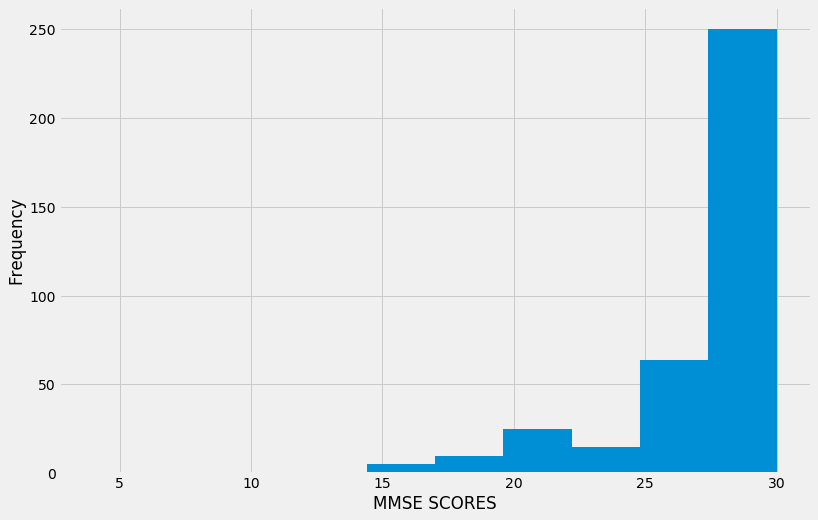

In [65]:
plt.style.use('fivethirtyeight')
long_df['MMSE'].plot(kind='hist', figsize=(12,8))
plt.xlabel('MMSE SCORES');

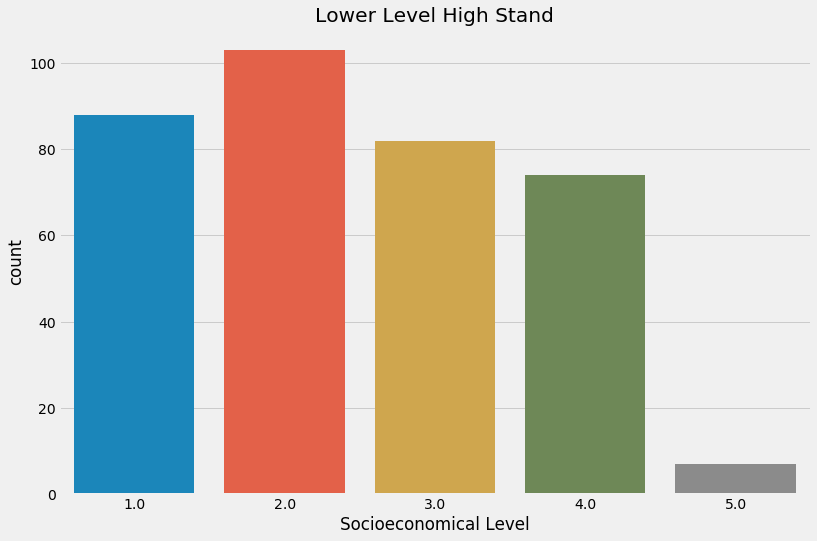

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(x=long_df['SES'])
plt.xlabel('Socioeconomical Level')
plt.title('Lower Level High Stand');

> Handling missing data is a tedious task. There are severeal methods in statistics but in general we call this process imputation. Missing data can cause multiple problems in statistical modelin process such as introducing significant bias and reductions in efficiency. Therefore, imputation is a way to avoid problems may arise from listwise deletion of missing values.
> 
>Three main methods are:
>- Listwise deletion
>- Single Imputation
>     - Hot Deck -a missing value was imputed from a randomly selected similar record
>     - Cold Deck -selects donors from another dataset
>     - Mean Substitution
>     - Median Substitution
>     - Regression -available information for complete and incomplete cases is used to predict the value of a specific variable
>     
>- Multiple Imputation



**Multiple Imputation**
Multiple imputation can be used in cases where the data is missing completely, missing at random, and even when the data is missing not at random. However, the primary method of multiple imputation is multiple imputation by chained equations (MICE).An important thing to note is that MICE should be implemented only when the missing data follow the missing at random mechanism. 

There are three assumptions on why the data is missing, Missing At Random, Missing Not at Random and Missing Completely at Random. In our case, MMSE and SES was supposed to collected from a subject during interviews and now let's take a look at other variables to determine our assumtion on why the data is not available. After analysing the table below, we might assume that the unavailable data in `SES` column is missing mostly like because subjects did not want to declare their financial statue as you can see most of them high school graduates. This type of missing data goes under `Missing Not at Random` as the subjects seem to choose not giving that information. As for the missing values in `MMSE`, there are only two subjects who are also missed giving `SES` information whereas others who did not report their finances were able take the test. These two subjects look like Missing Completely At Random. Identifying these assumptions could help analyst in choosing the method to deal with those missing values in data. 


Information was taken from [Wikipedia](https://en.wikipedia.org/wiki/Imputation_%28statistics%29#Multiple_imputation)

In [67]:
long_df[(long_df['MMSE'].isnull()) | ( long_df['SES'].isnull())]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


We can apply imputation techniques such as K-Nearast Neighbors to all data or just a Simple Linear Regression between two highly correlated predictors. Instead, here to fill missing values, for simplicity and since we do not have too many missing values to fill we go with traditional methods.

In [68]:
# Fill missing values with median as the data is skewed 
long_df.loc[:, 'MMSE_filled'] = long_df['MMSE'].fillna(long_df['MMSE'].median()).astype('int')

# Use mode 'frequent' value to replace missing values here
long_df.loc[:, 'SES_filled'] = long_df['SES'].fillna(long_df['SES'].median()).astype('int')

In [69]:
print('The total number of missing values at each column : \n' + str( long_df.isnull().sum()))

The total number of missing values at each column : 
Subject ID      0
MRI ID          0
Group           0
Visit           0
MR Delay        0
M/F             0
Hand            0
Age             0
EDUC            0
SES            19
MMSE            2
CDR             0
eTIV            0
nWBV            0
ASF             0
MMSE_filled     0
SES_filled      0
dtype: int64


### Remove: Zero Variance Predictor

The number of unique values in  predictor Hand is:  1


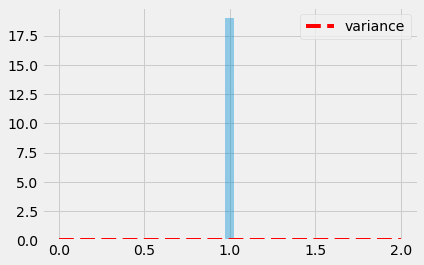

In [70]:
print('The number of unique values in  predictor Hand is: ',
      long_df['Hand'].nunique())

# Create dummy variables to represent Right Handed samples (all of the samples is right handed)
x = np.ones((len(long_df['Hand']), 1))

# Distplot will throw an error because of a singular matrix so we want to get an exception here
try:
    sns.distplot(x)
except:
    pass

# Show variance of the x vector
plt.hlines(x.var(), xmin=0, xmax=2, color='r',
           linestyles='dashed', label='variance')
plt.legend();

In [71]:
# Drop the predictor Hand and Save the file
long_df.drop(columns='Hand', axis=1, inplace=True)

> If a predictor has a single unique value we consider this predictor as an uninformative variable which can cause defects on problems in prediction some prediction models. It is better to remove this type of zero-variance predictors from the data.

> Before we wrap up this section, we need to fix the SES column in order for the values to represent correct information in the model. For example in the original SES column 1 stands for rich people and 5 for low income group, but 1 is lower than 5 so this could mis-lead model. What we want is to get 1 for low icome and 5 for high income group.
>
> Finally,  we convert categorical variables (Gender) to numeric representations of the values.

In [72]:
# Use mapping to reverse the order and economical status
ses_map = {1:5, 2:4, 3:3, 4:2, 5:1}
long_df['SES_filled'] = long_df['SES_filled'].map(ses_map)

In [73]:
# Encode Gender column as 0 and 1 for learning models
age_map = {'M':0, 'F':1}
long_df['M/F'] = long_df['M/F'].map(age_map)

In [78]:
df = long_df.copy()
# Save final dataset
df.to_csv('oasis_long.csv',index=False)

[Go To EDA]()